# K-Nearest Neighbors (KNN)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(color_codes=True)
%matplotlib inline

## Import the Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\moshe\Documents\Mechine Learning\K_Nearest_Neighbors\Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.shape

(400, 5)

## Select Variables

In [5]:
X = dataset.iloc[:, [2,3]].values

In [6]:
y = dataset.iloc[:, 4].values

In [7]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [8]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
print('The length of the training set in x is: %r' % len(X_train))
print('The length of the test set in x is: %r' % len(X_test))
print('The length of the training set in y is: %r' % len(y_train))
print('The length of the test set in y is: %r' % len(y_test))

The length of the training set in x is: 300
The length of the test set in x is: 100
The length of the training set in y is: 300
The length of the test set in y is: 100


## Feature Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_X = StandardScaler()

In [14]:
X_train = sc_X.fit_transform(X_train)

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
X_test = sc_X.transform(X_test)

C:\Users\moshe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
X_train[0:5]

array([[-0.73322926, -0.24572457],
       [-0.06838408, -0.38831136],
       [-0.06838408, -0.0175857 ],
       [ 1.07135053, -0.90162381],
       [-0.44829561, -0.84458909]])

In [17]:
X_test[0:5]

array([[ 2.02112936,  1.69345579],
       [-0.16336196,  0.80941769],
       [-0.06838408, -0.44534608],
       [ 2.11610724,  1.06607391],
       [-1.11314079, -1.01569324]])

## Fitting a KNN Model to the Training set

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [20]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)

## The Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test, y_pred)

In [24]:
cm

array([[62,  5],
       [ 3, 30]], dtype=int64)

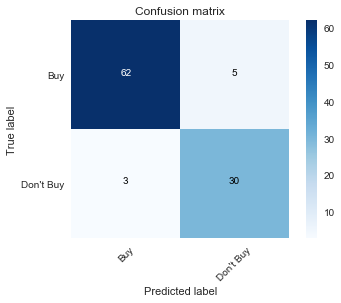

In [25]:
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues);
plt.title('Confusion matrix');
plt.colorbar();
tick_marks = np.arange(len(['Buy', 'Don\'t Buy']));
plt.xticks(tick_marks, ['Buy', 'Don\'t Buy'], rotation=45);
plt.yticks(tick_marks, ['Buy', 'Don\'t Buy']);
plt.grid(False);
    
fmt = '.0f';
thresh = cm.max() / 2.;
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black");

plt.ylabel('True label');
plt.xlabel('Predicted label');

# Visualize Dataset and Regression Boundary

In [26]:
from matplotlib.colors import ListedColormap

### For Training Set

In [27]:
X_set, y_set = X_train, y_train

In [28]:
X1, X2 = np.meshgrid(
    np.arange(
        start=X_set[:,0].min()-1, 
        stop=X_set[:,0].max()+1,
        step=0.01), 
    np.arange(
        start=X_set[:,1].min()-1,
        stop=X_set[:,0].max()+1, 
        step=0.01))

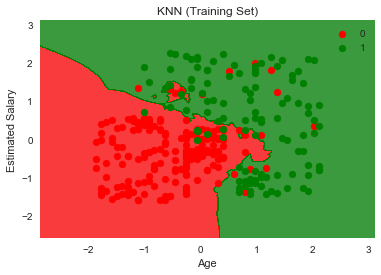

In [29]:
plt.contourf(X1, 
              X2, 
              classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), 
                label=j);
plt.title('KNN (Training Set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.grid(False)

### For Test Set

In [30]:
X_set, y_set = X_test, y_test

In [31]:
X1, X2 = np.meshgrid(
    np.arange(
        start=X_set[:,0].min()-1, 
        stop=X_set[:,0].max()+1,
        step=0.01), 
    np.arange(
        start=X_set[:,1].min()-1,
        stop=X_set[:,0].max()+1, 
        step=0.01))

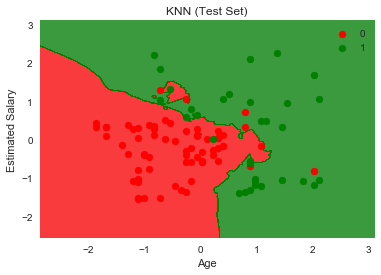

In [32]:
plt.contourf(X1, 
              X2, 
              classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap = ListedColormap(('red', 'green')));
plt.xlim(X1.min(), X1.max());
plt.ylim(X2.min(), X2.max());
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), 
                label=j);
plt.title('KNN (Test Set)');
plt.xlabel('Age');
plt.ylabel('Estimated Salary');
plt.legend();
plt.grid(False)

## Plot ROC Curve

In [33]:
from sklearn.metrics import roc_curve, auc

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [35]:
roc_auc = auc(fpr, tpr)

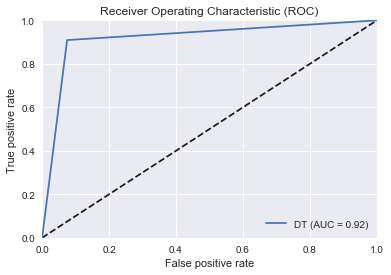

In [36]:
plt.figure(2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DT (AUC = %0.2f)' % (roc_auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='best')
plt.show()